In [1]:
import pandas
import collections
import numpy
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://www.kaggle.com/ronitf/heart-disease-uci
df = pandas.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

## Age

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

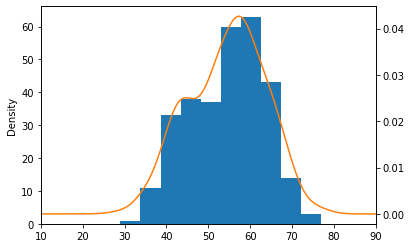

In [3]:

ax = df["age"].plot(kind='hist')
plt = df["age"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(10, 90)
df["age"].value_counts().nlargest(10)



## Sex

1    207
0     96
Name: sex, dtype: int64

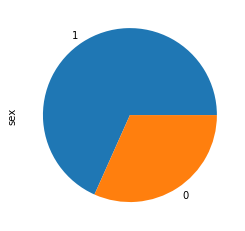

In [4]:
df["sex"].value_counts().plot(kind='pie')
df["sex"].value_counts()

## chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

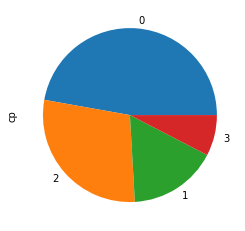

In [5]:
# cp: chest pain type
# -- Value 0: asymptomatic 無症狀
# -- Value 1: atypical angina
# -- Value 2: non-anginal pain
# -- Value 3: typical angina

df["cp"].value_counts().plot(kind='pie')
df["cp"].astype('category').value_counts()

## resting blood pressure 

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
Name: trestbps, dtype: int64

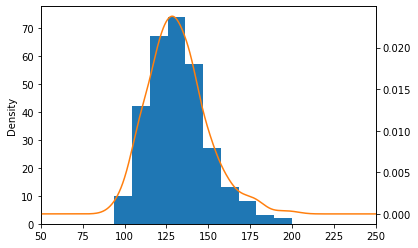

In [6]:
ax = df["trestbps"].plot(kind='hist')
plt = df["trestbps"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(50, 250)
df["trestbps"].astype('int').value_counts().nlargest(10)

## chol

234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
Name: chol, dtype: int64

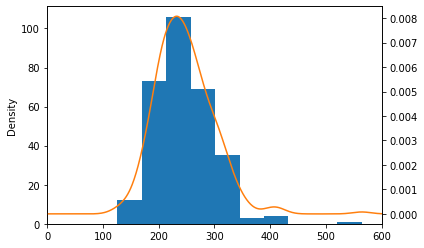

In [7]:
ax = df["chol"].plot(kind='hist')
plt = df["chol"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(0, 600)
df["chol"].astype('int').value_counts().nlargest(10)

## fasting blood sugar > 120 mg/dl

0    258
1     45
Name: fbs, dtype: int64

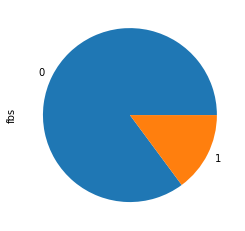

In [8]:
df["fbs"].value_counts().plot(kind='pie')
df["fbs"].value_counts()

## restecg

1    152
0    147
2      4
Name: restecg, dtype: int64

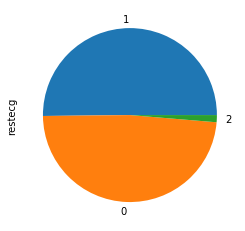

In [9]:
df["restecg"].value_counts().plot(kind='pie')
df["restecg"].astype('category').value_counts()

# 19 restecg: resting electrocardiographic results 
# -- Value 0: normal 
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

## maximum heart rate achieved 

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
Name: thalach, dtype: int64

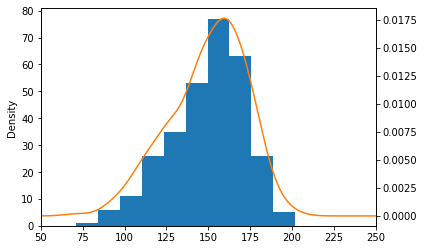

In [10]:
ax = df["thalach"].plot(kind='hist')
plt = df["thalach"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(50, 250)
df["thalach"].astype('int').value_counts().nlargest(10)

## exercise induced angina 

0    204
1     99
Name: exang, dtype: int64

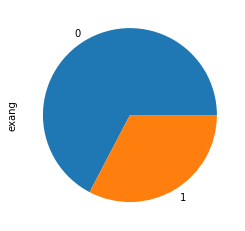

In [11]:
df["exang"].value_counts().plot(kind='pie')
df["exang"].value_counts()

In [12]:
## oldpeak

0    166
1     78
2     34
3     17
4      6
6      1
5      1
Name: oldpeak, dtype: int64

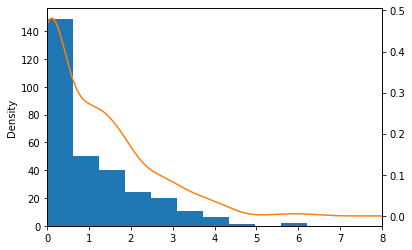

In [13]:
ax = df["oldpeak"].plot(kind='hist')
plt = df["oldpeak"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(0, 8)
df["oldpeak"].astype('int').value_counts().nlargest(10)

## the slope of the peak exercise ST segment

2    142
1    140
0     21
Name: slope, dtype: int64

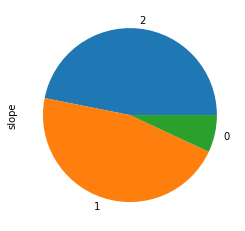

In [14]:
df["slope"].value_counts().plot(kind='pie')
df["slope"].astype('category').value_counts()

In [15]:
## ca

0.0    175
1.0     65
2.0     38
3.0     20
4.0      5
Name: ca, dtype: int64

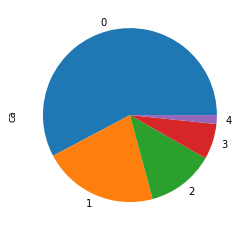

In [16]:
df["ca"].value_counts().plot(kind='pie')
df["ca"].astype('float').value_counts()

## thal

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

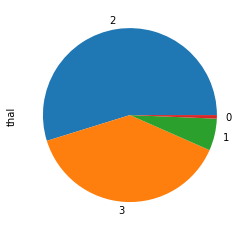

In [17]:
# thal: 1 = fixed defect; 2 = normal; 3 = reversable defect

df["thal"].value_counts().plot(kind='pie')
df["thal"].astype('category').value_counts()

In [18]:
## target

1    165
0    138
Name: target, dtype: int64

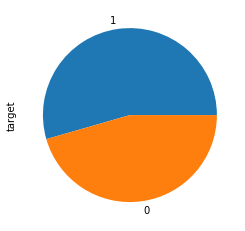

In [19]:
#  0 = disease, 1 = no disease
df["target"].value_counts().plot(kind='pie')
df["target"].astype('category').value_counts()

# Pre-processing

In [20]:
print(len(df.columns))
df.columns

14


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df[["age","slope","trestbps","chol", "thalach", "oldpeak", "slope"]] 

# age slope, ca += 
# trestbps chol thalach oldpeak %

,age,slope,trestbps,chol,thalach,oldpeak,slope
0,63,0,145,233,150,2.3,0
1,37,0,130,250,187,3.5,0
2,41,2,130,204,172,1.4,2
3,56,2,120,236,178,0.8,2
4,57,2,120,354,163,0.6,2
...,...,...,...,...,...,...,...
298,57,1,140,241,123,0.2,1
299,45,1,110,264,132,1.2,1
300,68,1,144,193,141,3.4,1
301,57,1,130,131,115,1.2,1


In [22]:
df[["age","slope","ca"]] = (df[["age","slope","ca"]] - df[["age","slope","ca"]].mean())
df[["trestbps","chol", "thalach", "oldpeak"]] = (df[["trestbps","chol", "thalach", "oldpeak"]] - df[["trestbps","chol", "thalach", "oldpeak"]].min()) / df[["trestbps","chol", "thalach", "oldpeak"]].max()

In [23]:
df[["sex", "cp", "fbs", "restecg", "exang", "thal"]]

# sex fbs exang 10
# cp restecg cat (change to 10)
# thal  missing values

,sex,cp,fbs,restecg,exang,thal
0,1,3,1,0,0,1
1,1,2,0,1,0,2
2,0,1,0,0,0,2
3,1,1,0,1,0,2
4,0,0,0,1,1,2
...,...,...,...,...,...,...
298,0,0,0,1,1,3
299,1,3,0,1,0,3
300,1,0,1,1,0,3
301,1,0,0,1,1,3


In [24]:
df[["sex","fbs","exang"]]

,sex,fbs,exang
0,1,1,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1
...,...,...,...
298,0,0,1
299,1,0,0
300,1,1,0
301,1,0,1


In [25]:
# df[["cp","restecg"]]
df["cp"] = df["cp"].replace(to_replace =[2,3], value =0) 
df["restecg"] = df["restecg"].replace(to_replace =[2,3], value =0) 
df[["cp","restecg"]]




,cp,restecg
0,0,0
1,0,1
2,1,0
3,1,1
4,0,1
...,...,...
298,0,1
299,0,1
300,0,1
301,0,1


In [26]:
df = df[df["thal"] != 0] # remove Null
df["thal"] = df["thal"].replace(to_replace =[1,3], value =1) # 不正常 有疾病
df["thal"] = df["thal"].replace(to_replace =[2], value =0) # 正常 

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,8.633663,1,0,0.255,0.189716,1,0,0.391089,0,0.370968,-1.39934,-0.729373,1,1
1,-17.366337,1,0,0.180,0.219858,0,1,0.574257,0,0.564516,-1.39934,-0.729373,0,1
2,-13.366337,0,1,0.180,0.138298,0,0,0.500000,0,0.225806,0.60066,-0.729373,0,1
3,1.633663,1,1,0.130,0.195035,0,1,0.529703,0,0.129032,0.60066,-0.729373,0,1
4,2.633663,0,0,0.130,0.404255,0,1,0.455446,1,0.096774,0.60066,-0.729373,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2.633663,0,0,0.230,0.203901,0,1,0.257426,1,0.032258,-0.39934,-0.729373,1,0
299,-9.366337,1,0,0.080,0.244681,0,1,0.301980,0,0.193548,-0.39934,-0.729373,1,0
300,13.633663,1,0,0.250,0.118794,1,1,0.346535,0,0.548387,-0.39934,1.270627,1,0
301,2.633663,1,0,0.180,0.008865,0,1,0.217822,1,0.193548,-0.39934,0.270627,1,0


# Feature Importance

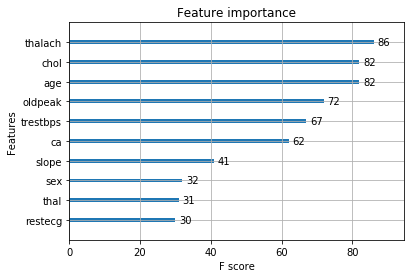

In [28]:
# xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import numpy as np 

model = XGBClassifier()
model.fit(df.drop(columns = ["target"]), df["target"])

# plot feature importance
plot_importance(model, max_num_features= 10)
pyplot.show()

Feature ranking:
1. feature 12 thal (0.175314)
2. feature 11 ca (0.124064)
3. feature 7 thalach (0.094940)
4. feature 8 exang (0.094518)
5. feature 9 oldpeak (0.090778)
6. feature 0 age (0.084061)
7. feature 3 trestbps (0.074333)
8. feature 4 chol (0.071499)
9. feature 10 slope (0.062802)
10. feature 1 sex (0.047328)


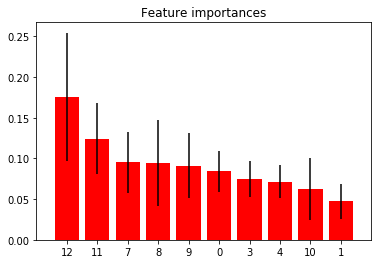

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(df.drop(columns = ["target"]),df["target"])
importances = forest.feature_importances_


std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,10):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], df.keys()[indices[f]], importances[indices[f]]))
    
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,10), importances[indices[:10]],
       color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(0,10), indices)
plt.xlim([-1, 10])
plt.show()

# Dateset split

In [30]:
from sklearn.utils import shuffle
df = shuffle(df)

In [31]:
Test_set = df[:100]
Train_set = df[100:]

Train_Y = Train_set["target"]
Train_X = Train_set.drop(columns = ["target"])
Test_Y = Test_set["target"]
Test_X = Test_set.drop(columns = ["target"])
Test_Y.value_counts(), Train_Y.value_counts()


(1    58
 0    42
 Name: target, dtype: int64,
 1    106
 0     95
 Name: target, dtype: int64)

In [36]:
import imblearn
from collections import Counter
rus = imblearn.over_sampling.ADASYN(ratio={1: 300, 0:200 }, random_state=0)
# rus = imblearn.over_sampling.KMeansSMOTE()


X_rus, Y_rus = rus.fit_sample(Train_X, Train_Y)
print(sorted(Counter(Y_rus).items()))

[(0, 197), (1, 304)]


In [38]:

rus = imblearn.over_sampling.SMOTE(ratio={1: 300, 0:200 }, random_state=0)
# rus = imblearn.over_sampling.KMeansSMOTE()


X_rus, Y_rus = rus.fit_sample(Train_X, Train_Y)
print(sorted(Counter(Y_rus).items()))

[(0, 200), (1, 300)]


# ML Models 

In [46]:
#sklearn
import sklearn
import sklearn.model_selection
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [54]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=3, random_state=0)
clf.fit(X_rus, Y_rus)

print(sklearn.metrics.classification_report(Y_rus, clf.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, clf.predict(Test_X)) )



              precision    recall  f1-score   support

           0       0.83      0.81      0.82       200
           1       0.87      0.89      0.88       300

    accuracy                           0.86       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.85      0.91      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100



In [100]:
mlp = MLPClassifier(solver='adam',  # weight optimization
                    activation='tanh',  # activation function
                    alpha=0, # Regularizer value
                    hidden_layer_sizes=(10,10), # layer and node (node,node) --> numbers of layers
                    random_state=1, #random state
                    max_iter = 500, # max iteration
                    early_stopping = True) # early stop
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(10,7), random_state=1, max_iter = 500, early_stopping = True)





mlp.fit(X_rus, Y_rus) # fit the neural network
print(sklearn.metrics.classification_report(Y_rus, mlp.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, mlp.predict(Test_X)) )




              precision    recall  f1-score   support

           0       0.84      0.80      0.82       200
           1       0.87      0.90      0.88       300

    accuracy                           0.86       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        42
           1       0.81      0.90      0.85        58

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.60      1.00      0.75       300

    accuracy                           0.60       500
   macro avg       0.30      0.50      0.37       500
weighted avg       0.36      0.60      0.45       500

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.58      1.00      0.73        58

    accuracy                           0.58       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.34      0.58      0.43       100

